# 🗺️**Understanding Sustainable Development Goals through maps**  
## Exploring the role of map generalisation

The aim of this Notebook is to present some **map generalization techniques** (i.e. transforming the cartographic representation of entities to reduce map complexity), which are essential when mapping a phenomenon at different scales. 
- Most of the techniques presented are based on **CartAGen**, which is :

    - an **open source Python library** made by **IGN** (i.e the french national mapping agency) researchers
    - a tool to carry out cartographic generalization processes and **automate** them
    - a **QGIS plugin** to use the Python library in a GIS environment 

- 🔗 **Useful links** : 
    - [Library repository](https://github.com/LostInZoom/cartagen4py?tab=readme-ov-file) 
    - [QGIS Plugin](https://plugins.qgis.org/plugins/cartagen4qgis/#plugin-details)
    - [CartAGen documentation](https://cartagen.readthedocs.io/en/latest/)
    - [UN Sustainable Development Goals](https://sdgs.un.org/goals)

_by Paul Bourcier, 2025 - EUPL 1.2_ 

## ⚙️ **Part 0 :** Preparing the working environment

In [1]:
# Importing libraries

import cartagen as cg # the main library, containing cartographic generalization algorithms

#geographic data manipulation 
import geopandas as gp # used to import and manipulate geographic data

#displaying the data
from matplotlib import pyplot as plt # for ploting results, especially maps
#from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar # adding scalebar to the maps
#import matplotlib.colors as matcol # generating color palettes
#from matplotlib.path import Path  # Plot generation
#from matplotlib.patches import PathPatch # Plot generation
#from mpl_toolkits.axisartist.axislines import Subplot # Plot generation
#import matplotlib.colors as mcolors #generating colors 
#import matplotlib.cm as cm #used to display colorbar
#import contextily as ctx # Adding basemaps

#creating interactive outputs
import ipywidgets # creation of interactive plots
#import pydeck as pdk #deck.gl in Python for interactive maps
#import json #manipulating dictionnaries
#import ipyleaflet #creates interactive maps

# other data manipulation
#import pandas as pd # used to concatenate datas
import numpy as np # Using mathematical operations in Python
#from sklearn import cluster #clustering methods


## 📈 **Part 1 :** Maps and SDGs : the example of the Gini index

🧠 To understand the SDGs and how to achieve it, one must understand some **indicators**. Let's take the example of SDG n°10 : _"Reduce inequality within and among countries"_.

The **Gini index** is a key indicator for understanding this objective, as it measures the way in which a **resource** (notably disposable income) is **distributed** among the inhabitants of a country or region. It ranges from **0** (perfect equality) to **1** (no equality).

Gini index is derived from the **Lorenz's cruve**. Before diving into maps, let's take a closer look to it.

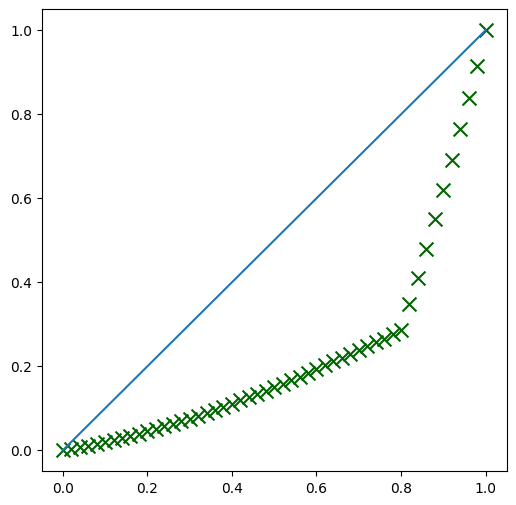

In [24]:
# First, retrieve all the income of a population. Here we build an artificial value sample, representing our income.
income = np.array([2, 10, 24, 4, 7, 800, 56, 32, 1, 5, 46, 78, 336])  
# Let's populate our array of value thanks to numpy functions, as it enable to get a bigger sample more quickly
income = np.append(np.random.poisson(lam=10, size=40), np.random.poisson(lam=100, size=10)) #here we use Poisson random to draw. We could use another function

# Secondly, we must sort our income, from lowest to highest
income = np.sort(income)

# Thirdly, we convert our values into cummulated proportions
income = income.cumsum() / income.sum()
# we then had 0 as our first value
income = np.insert(income,0,0)

# We now compute the cummulated proportions of people/household in our population
pop = np.arange(income.size)/(income.size-1)

# Finally, we can display the Lorenz cruve, that shows the distribution of income by the population
fig, ax = plt.subplots(figsize=[6,6])
ax.scatter(pop , income, marker='x', color='darkgreen', s=100)
## We had a line representing perfect equality
ax.plot([0,1], [0,1])


📈 The x axis represent the **cummulated proportion of household** (sorted by income) while the y axis shows the **cummulated proportion of the income**. In this situation, approximatly **80%** of the poorest holds less than **30%** of the income, which is a clear inequality. On the contrary, the straight line is showing the **perfect equality situation**, were **80%** of the poorest holds **80%** of the income.

The Gini index correspond to the area between the Lorenz curve and the straight line representing perfect equality. It is also possible to compute it with this formula :
$$
Gini = \frac{2 \sum_{i=1}^{n} i \times y_i}{n \sum_{i=1}^{n} y_i} - \frac{n + 1}{n}
$$
A weighted sum of the income is divided by the sum of the income, and normalized by substracting a constant. 

In [ ]:
# Let's compute the Gini index of our first example
coef_ = 2. / income.size #numerator part 1
weighted_sum = sum([(i+1)*yi for i, yi in enumerate(income)]) #numerator part 2
const_ = (income.size + 1.) / income.size #constant

gini = coef_*weighted_sum/(income.sum()) - const_
print("Gini index : " + str(gini))

Gini index : 0.5341311565250086


Here an animation to seize the effect on Lorenz curve on Gini index

In [44]:
def plt_gini_lorenz(income_diff):
    incm = np.append(np.random.poisson(lam=10, size=50), np.random.poisson(lam=income_diff, size=50))
    incm = np.sort(incm)
    incm = incm.cumsum() / incm.sum()
    incm = np.insert(incm,0,0)
    popu = np.arange(incm.size)/(incm.size-1)

    gini = (2. / incm.size)*sum([(i+1)*yi for i, yi in enumerate(incm)])/(incm.sum()) - ((incm.size + 1.) / incm.size) 

    fig, ax = plt.subplots(figsize=[6,6])
    ax.scatter(popu , incm, marker='x', color='darkgreen', s=100) 
    ax.plot([0,1], [0,1], color='k')
    ax.text(0.35, 0.8, f'Gini index : {round(gini,2)}', fontsize=12, color='red', ha='right')


ipywidgets.interact(plt_gini_lorenz, income_diff = (0, 100, 1))

interactive(children=(IntSlider(value=50, description='income_diff'), Output()), _dom_classes=('widget-interac…

<function __main__.plt_gini_lorenz(income_diff)>